<a href="https://colab.research.google.com/github/allansdefreitas/python/blob/master/get_tweets_wordclou_tweepy_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import csv
import pandas as pd 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
% matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 

#https://www.datacamp.com/community/tutorials/wordcloud-python

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
#SET USERNAME
TWITTER_USERNAME = "jairbolsonaro"

#set count to however many tweets you want RETRIEVE
NUMBER_OF_TWEETS = 3200


In [0]:
#http://www.tweepy.org/
import tweepy

#Get your Twitter API credentials and enter them here
CONSUMER_KEY = ''
CONSUMER_SECRET = ''
ACCESS_TOKEN = ''
ACCESS_TOKEN_SECRET = ''

#method to get a user's last tweets
def get_tweets(username):

	#http://tweepy.readthedocs.org/en/v3.1.0/getting_started.html#api
	auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
	auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
	api = tweepy.API(auth)

	
	#get tweets
	tweets_for_csv = []
	for tweet in tweepy.Cursor(api.user_timeline, screen_name = username).items(NUMBER_OF_TWEETS):
        #create array of tweet information: username, tweet id, date/time, text
		tweets_for_csv.append([username, tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")])

	#write to a new csv file from the array of tweets
	outfile = username + "_tweets.csv"
	print ("writing to ", outfile)
	with open(outfile, 'w+') as file:
		writer = csv.writer(file, delimiter=',')
		writer.writerows(tweets_for_csv)




In [0]:
get_tweets(TWITTER_USERNAME)

writing to  jairbolsonaro_tweets.csv


In [0]:
df_user_twitter = pd.read_csv(TWITTER_USERNAME + "_tweets.csv")


In [0]:
df_user_twitter.head(5)

,jairbolsonaro,1170519396793704448,2019-09-08 02:09:06,b'- Um grande dia hoje! Vi nos olhos dos brasileiros o renascer da esperan\xc3\xa7a de um futuro melhor para o Brasil. Com a\xe2\x80\xa6 https://t.co/OUQRFDxfgI'
0,jairbolsonaro,1170505326241689600,2019-09-08 01:13:11,"b'- O garoto Ivo C\xc3\xa9sar Gonzales, de 9 a..."
1,jairbolsonaro,1170416765135986689,2019-09-07 19:21:16,"b'- Dia de maestro, regendo ""Eterno Her\xc3\xb..."
2,jairbolsonaro,1170380971360886786,2019-09-07 16:59:02,b'\xf0\x9f\x87\xa7\xf0\x9f\x87\xb7\xf0\x9f\xa4...
3,jairbolsonaro,1170380024362479616,2019-09-07 16:55:17,b'\xf0\x9f\x87\xa7\xf0\x9f\x87\xb7\xf0\x9f\xa4...
4,jairbolsonaro,1170354498499428352,2019-09-07 15:13:51,b'\xf0\x9f\x87\xa7\xf0\x9f\x87\xb7\xf0\x9f\xa4...


In [0]:
# DATASET HAS NO COLUMN HEADERS: LETS ADD HEADERS
df_user_twitter.columns = ['user', 'unknow_number', 'date', 'tweet_text']


In [0]:
text = df_user_twitter['tweet_text']

In [0]:
df_user_twitter.head(1)

,user,unknow_number,date,tweet_text
0,jairbolsonaro,1170505326241689600,2019-09-08 01:13:11,"b'- O garoto Ivo C\xc3\xa9sar Gonzales, de 9 a..."


In [0]:
type(df_user_twitter.tweet_text.head)

method

In [0]:
 # data cleaning
 # tweet_text_letters_only = re.sub(re.compile('<.*?>'), ' ', text) #removing html tags
  #tweet_text_letters_only =  re.sub('[^A-Za-z0-9]+', '  ', text) #taking only words
  
  tweet_text_letters_only = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(text))
  

In [0]:
tweet_text_letters_only

'        b   O garoto Ivo C xc  xa sar Gonzales  de   a            b   Dia de maestro  regendo  Eterno Her xc  xb            b  xf  x f x   xa  xf  x f x   xb  xf  x f xa             b  xf  x f x   xa  xf  x f x   xb  xf  x f xa             b  xf  x f x   xa  xf  x f x   xb  xf  x f xa             b   VIVA O BRASIL  VIVA A NOSSA INDEPEND xc  x            b   Em todo o Brasil  com o povo  hoje comemor                           b Mais detalhes   MEC Comunicacao          b Assinada a MP da Liberdade Estudantil  Gratu            b   Obrigado Santa Casa de Juiz de Fora  n n              b Live de quinta feira com o Presidente  Minis                                   b https   t co nxEAZa DuL          b Publicado no DOU a Lei de Abuso de autoridad            b Participamos do lan xc  xa amento do Program            b Viagens de neg xc  xb cios no Brasil crescer            b Presidentes com  postura  foram respons xc              b Apreens xc  xa o recorde de coca xc  xadna p            b Est

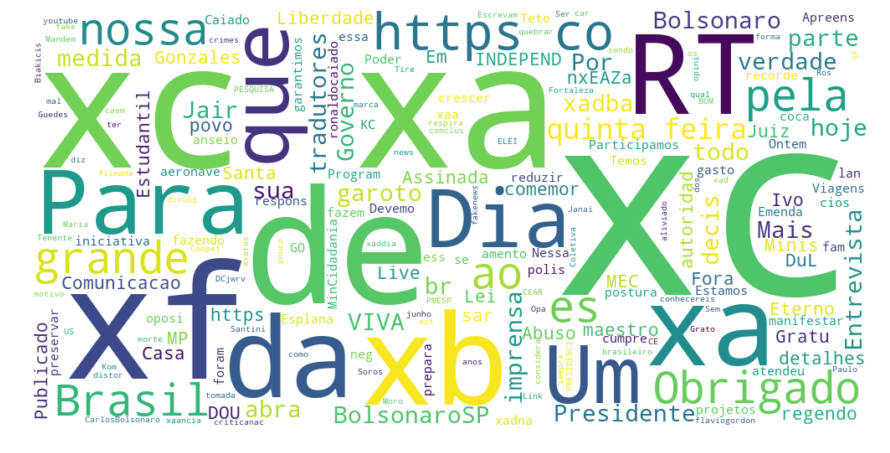

In [0]:
#PRINTANDO SEM STOPWORDS


#text = df_user_twitter.tweet_text

# Create and generate a word cloud image:
wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(tweet_text_letters_only)

# Display the generated image:

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



In [0]:
#HOW MANY WORDS. that is it???
print ("There are {} words in the combination of all tweet_text_letters_only.".format(len(tweet_text_letters_only)))

There are 3583 words in the combination of all tweet_text_letters_only.


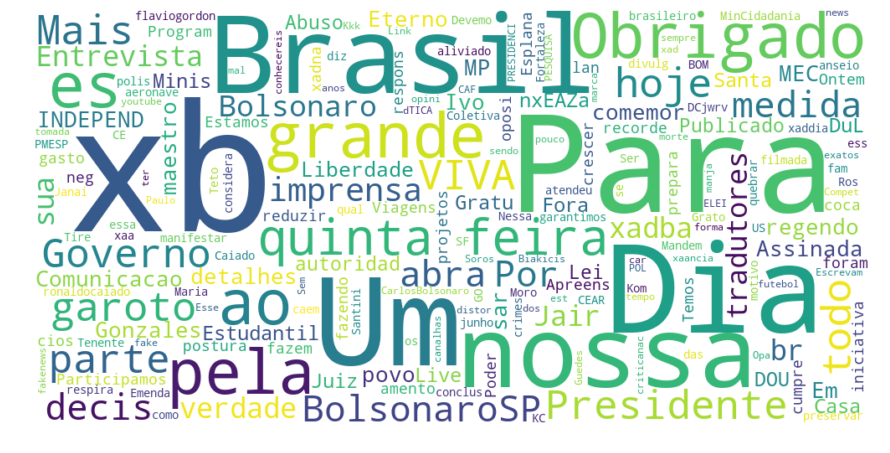

In [0]:
# Create stopword list:

#STOP WORDS: WHAT LANGUAGE?
stopwords = set(STOPWORDS)

#stopwords= set(stopwords.words('portuguese'))
#stopwords = nltk.corpus.stopwords.words('portuguese')

#IN PORTUGEUES THERE IS NOT UPDATE ATTRIBUTE DO ADD STOP WORDS 
stopwords.update(["https", "http", "CO", "RT", "XC", "http", "https", "nhttps", "Xe", "xf", "Xa", "da", "que", "de"])

#stopwords.append(["https", "http", "CO", "RT", "XC", "http", "https", "nhttps", "Xe", "xf", "Xa"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, width=1000, height=500, background_color="white").generate(tweet_text_letters_only)


plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()